# Unsupervised Deep Learning

# Self Organizing Maps (SOM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [2]:
# Importing the dataset.
# UCI- Statlog (Australian Credit Approval) Dataset.

cred_card=pd.read_csv('Credit_Card_Applications.csv')
cred_card

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
cred_card.shape

(690, 16)

In [4]:
cred_card.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [5]:
cred_card.describe(exclude=None)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [6]:
cred_card.corr()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
CustomerID,1.000000,-0.017669,0.001531,0.048405,0.071517,-0.053314,-0.056552,0.055084,0.041009,0.019781,-0.006900,-0.002839,0.015464,-0.020295,0.040060,0.035400
A1,-0.017669,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.001531,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,0.048405,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,0.071517,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.053314,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,-0.056552,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.055084,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.041009,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,0.019781,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301


In [7]:
cred_card.corr()['Class'].sort_values(ascending=False)

Class         1.000000
A8            0.720407
A9            0.458301
A10           0.406410
A5            0.373712
A7            0.322475
A6            0.246567
A3            0.206294
A4            0.194306
A14           0.175657
A2            0.161626
A12           0.115261
CustomerID    0.035400
A11           0.031625
A1           -0.013897
A13          -0.099972
Name: Class, dtype: float64

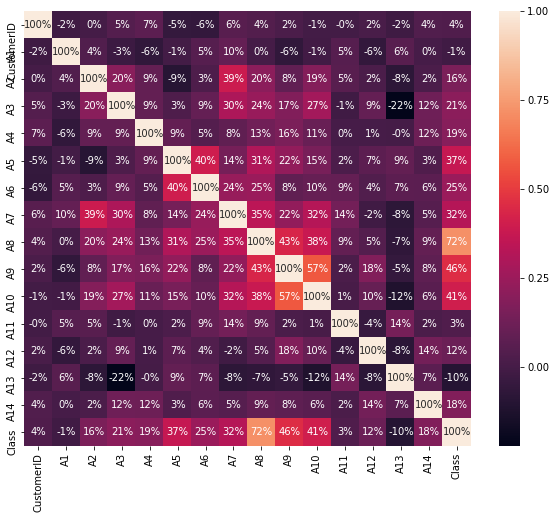

In [8]:
plt.figure(figsize=(10,8))
sb.heatmap(cred_card.corr(),annot= True, fmt='.0%')

In [9]:
# Frauds are actually outlying neurons in this 2-D SOm because the Outline neurons are far from majority neurons who follow the rules.
# We detect the Outline Neurons using the MIT i.e 'Mean Interneuron Dsiatnce'.
# For each neuron we compute the 'Mean of Euclidean Distance btwn neuron' and its neighbourhood neuron.
# We define the Neighborhood neuron manually, and calculate mean of euclidean distances by doing this we detect the outliers.

# Creating the subsets.
X=cred_card.iloc[:, :-1].values
y=cred_card.iloc[:,-1].values

# We splitted the dataset into X & y.We done this to make distinction in the end between the customers who were approved and not approved.
# We train our SOM using only 'X' since its unsupervised DL.

In [10]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [11]:
# Feature Scaling.
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

X=sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Training the SOM.

In [12]:
#!pip install MiniSom

In [13]:
# MiniSom implementation of SOM.
from minisom import MiniSom

In [14]:
# Arguments will be x, y i.e dimensions of the grid to SOM.These dimensions should not be small since we need the outliers in that.
# Hence we take 10,10 grid,
# Next parameter will be 'input_len' i.e number of features in our dataset
# Sigma is the radius of the different neighborhoods in the grid. Default is 1.0
# Learning_rate is hyper parameter that decides how much the weights are updated during each learning rate. Higher the learning rate faster will be to  build a SOM.
som=MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

# Initializing the weights randomly close to 0 but not 0. Using the 'random_weights_init' method.
som.random_weights_init(X)

# Method to train SOM using 'train_random' by specifying the number of iterations.
som.train_random(data=X, num_iteration=100)

In [15]:
# Visualizing the result to detect the outliers using 'pylab' library.
from pylab import bone, pcolor, colorbar, plot, show

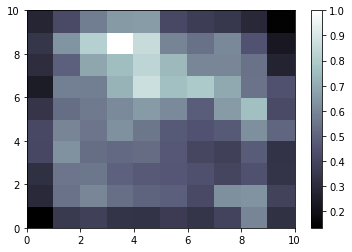

In [16]:
# bone function to initialize the map.
bone()

# First we put the different winning nodes(BMU) on the map using the information of 'Mean interneuron Distance' for all the winning nodes using pcolor function function.
# Distance map includes all the Mean Interneuon Distances in one matrix. 
# T is transpose of MID matrix to get it in right order.
pcolor(som.distance_map().T)

# colorbar exactly gives us legend of all these colors.
colorbar()

In [17]:
# From above the highest MID is 1 i.e white color and smallest MID is 0.2 i.e dark in color.
# Hence its 1.0 MID are outlying winning nodes which are far from general rules.

# Next is to get explicit list of customers by just inverse mapping winning node to check which customers are associated to this winning node.
# By adding some markers, to each of the winning node, If the customers are associated to these winning nodes, got approval or not.
# We create red circles & green squares, where red circles symbolizes the customers who didnt get approval & green squares corresponds to customers who got approval.

# Creating vectors of 2 elements.
markers=['o', 's'] # 'o' is circle, 's' is square.
colors=['r', 'g'] # 'r' is red, 'g' is green.

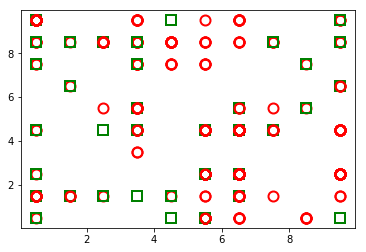

In [18]:
# Creating a for loop.
# i is all rows i.e all indexes of customers.
# x is all vectors of the customers @ different iterations.
for i, x in enumerate(X):
    w= som.winner(x)
    plot(w[0] + 0.5,# x coordinate of winning node
         w[1] + 0.5,# y coordinate of winning node
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize=10,
        markeredgewidth=2)
show()

# w is winning node, winner method; for this winning node we place marker on it.
# Inside plot we specify the coordinates, we would like to put this marker in center of the winning node which is represented as'square'. 
# Therefore coordinates for winning nodes are w[0]&w[1] and we want to put at center hence we add 0.5 to put it in the middle of the horizontal base of the square.
# To specify marker to be red or green; 'i' is the index of customer and y[i] is the value of dependent variable i.e 0 if customer didnt get approval & 1 if he got approval.


In [19]:
# Finding the frauds.
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(6,
              4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
                     0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 6.00000000e-02, 6.70000000e-04]), array([4.64667700e-01, 1.00000000e+00, 7.89473684e-02, 6.25000000e-02,
                     0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 8.19298246e-02,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 5.60000000e-02, 6.00000000e-05]), array([0.15204081, 1.        , 0.10406015, 0.02982143, 0.        ,
                     0.5

In [20]:
# First Outlying winning node.
# Using mapping coordinates we select outlying winning node. At coordinate 8,1 as winning node from diagram, we select those customers.
# Concatenating both nodes i.e at (8,1) & (6,8)
# (9,1), (7,9)

frauds=np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis=0) # axis=0 means along vertical axis (below)

In [22]:
# Inverse Transform for those scaled variables.
frauds=sc.inverse_transform(frauds)
frauds

array([[3.89102164e+12, 1.00000000e+00, 3.49369500e+03, 3.85000000e+01,
        3.00000000e+00, 1.05000000e+02, 6.50000000e+01, 2.69610000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 4.00000000e+05, 1.01000010e+07],
       [3.89778230e+12, 1.00000000e+00, 2.73493000e+03, 6.30000000e+01,
        3.00000000e+00, 1.83000000e+02, 6.50000000e+01, 2.85000000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 3.52000000e+05, 1.00001000e+05],
       [3.89047423e+12, 1.00000000e+00, 1.30518000e+03, 4.20000000e+01,
        3.00000000e+00, 1.70000000e+02, 3.30000000e+01, 5.70000000e+01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 2.00000000e+05, 2.10000100e+06],
       [3.93834329e+12, 1.00000000e+00, 2.18630500e+03, 2.52000000e+02,
        3.00000000e+00, 1.18000000e+02, 6.50000000e+01, 1.49625000e+02,
        1.00000000e+00, 0.00000000e+0

In [31]:
print('Fraud Customer IDs')
for i in frauds[:,0]:
    print(int(i))

Fraud Customer IDs
3891021638020
3897782301508
3890474232052
3938343285688
3893567125717
3914413503721
3903700629079
3934144092553
3899487201391
3940275189232
3902156304943
3948959764936
3903427675282
3941869459168
3947787287281
